In [66]:
from helper_code import *
import numpy as np, os, sys, joblib
import ecg_plot
import pandas as pd

In [51]:
data_directory = "data/WFDB_Ga"
header_files, recording_files = find_challenge_files(data_directory)
num_recordings = len(recording_files)

if not num_recordings:
    raise Exception('No data was provided.')

# Extract the classes from the dataset.
print('Extracting classes...')

classes = set()
for header_file in header_files:
    header = load_header(header_file)
    classes |= set(get_labels(header))
if all(is_integer(x) for x in classes):
    classes = sorted(classes, key=lambda x: int(x)) # Sort classes numerically if numbers.
else:
    classes = sorted(classes) # Sort classes alphanumerically if not numbers.
num_classes = len(classes)

# Extract the features and labels from the dataset.
print('Extracting features and labels...')

data = np.zeros((num_recordings, 14), dtype=np.float32) # 14 features: one feature for each lead, one feature for age, and one feature for sex
labels = np.zeros((num_recordings, num_classes), dtype=np.bool_) # One-hot encoding of classes

for i in range(num_recordings):
    print('    {}/{}...'.format(i+1, num_recordings))

    # Load header and recording.
    header = load_header(header_files[i])
    recording = load_recording(recording_files[i])

    # Get age, sex and root mean square of the leads.
    age, sex, rms = get_features(header, recording, twelve_leads)
    data[i, 0:12] = rms
    data[i, 12] = age
    data[i, 13] = sex

    current_labels = get_labels(header)
    for label in current_labels:
        if label in classes:
            j = classes.index(label)
            labels[i, j] = 1

    6862/10344...
    6863/10344...
    6864/10344...
    6865/10344...
    6866/10344...
    6867/10344...
    6868/10344...
    6869/10344...
    6870/10344...
    6871/10344...
    6872/10344...
    6873/10344...
    6874/10344...
    6875/10344...
    6876/10344...
    6877/10344...
    6878/10344...
    6879/10344...
    6880/10344...
    6881/10344...
    6882/10344...
    6883/10344...
    6884/10344...
    6885/10344...
    6886/10344...
    6887/10344...
    6888/10344...
    6889/10344...
    6890/10344...
    6891/10344...
    6892/10344...
    6893/10344...
    6894/10344...
    6895/10344...
    6896/10344...
    6897/10344...
    6898/10344...
    6899/10344...
    6900/10344...
    6901/10344...
    6902/10344...
    6903/10344...
    6904/10344...
    6905/10344...
    6906/10344...
    6907/10344...
    6908/10344...
    6909/10344...
    6910/10344...
    6911/10344...
    6912/10344...
    6913/10344...
    6914/10344...
    6915/10344...
    6916/10344...
    6917/1

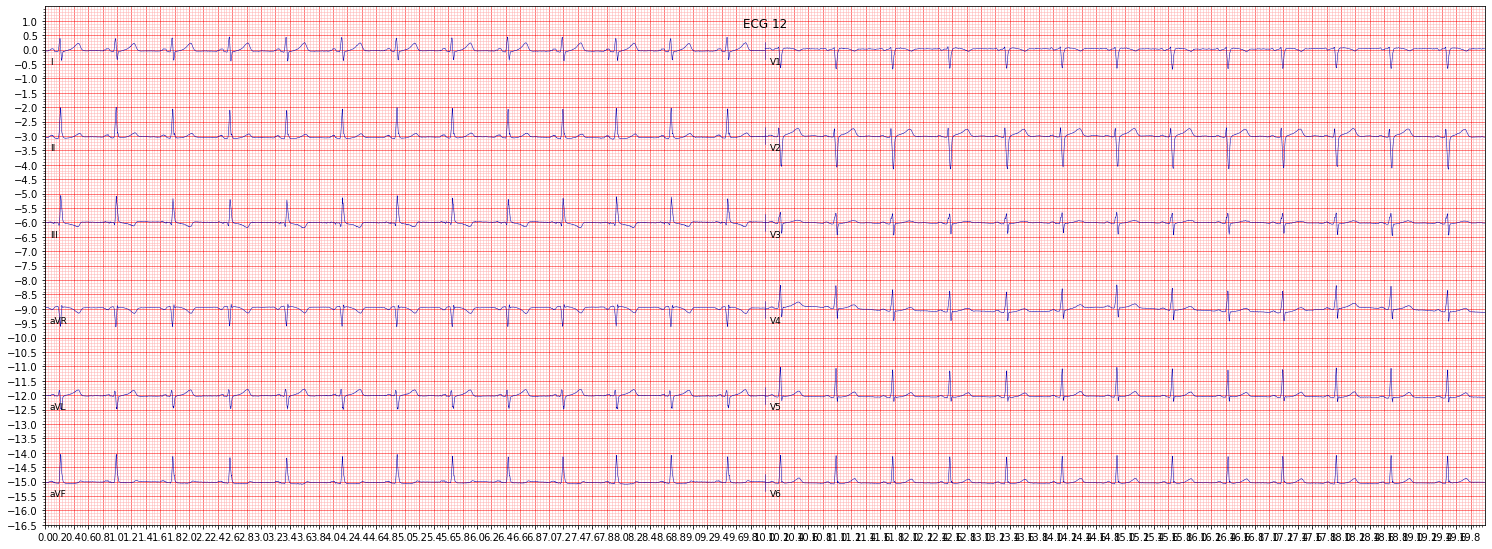

In [64]:
ecg_num = 13 
header = load_header(header_files[ecg_num])
leads = load_recording(recording_files[i])
ecg_plot.plot(leads/np.max(leads))

In [71]:
leads/np.max(leads)

array([[-0.04892086, -0.04892086, -0.04892086, ..., -0.02805755,
        -0.03093525, -0.03093525],
       [-0.05611511, -0.05611511, -0.05611511, ..., -0.02446043,
        -0.02446043, -0.02446043],
       [-0.00647482, -0.00647482, -0.00647482, ...,  0.0028777 ,
         0.00647482,  0.00647482],
       ...,
       [-0.01366906, -0.01366906, -0.01366906, ..., -0.1294964 ,
        -0.12230216, -0.12230216],
       [-0.03453237, -0.03453237, -0.03453237, ..., -0.06978417,
        -0.06978417, -0.06978417],
       [-0.04172662, -0.04172662, -0.04172662, ..., -0.02446043,
        -0.02446043, -0.02446043]])

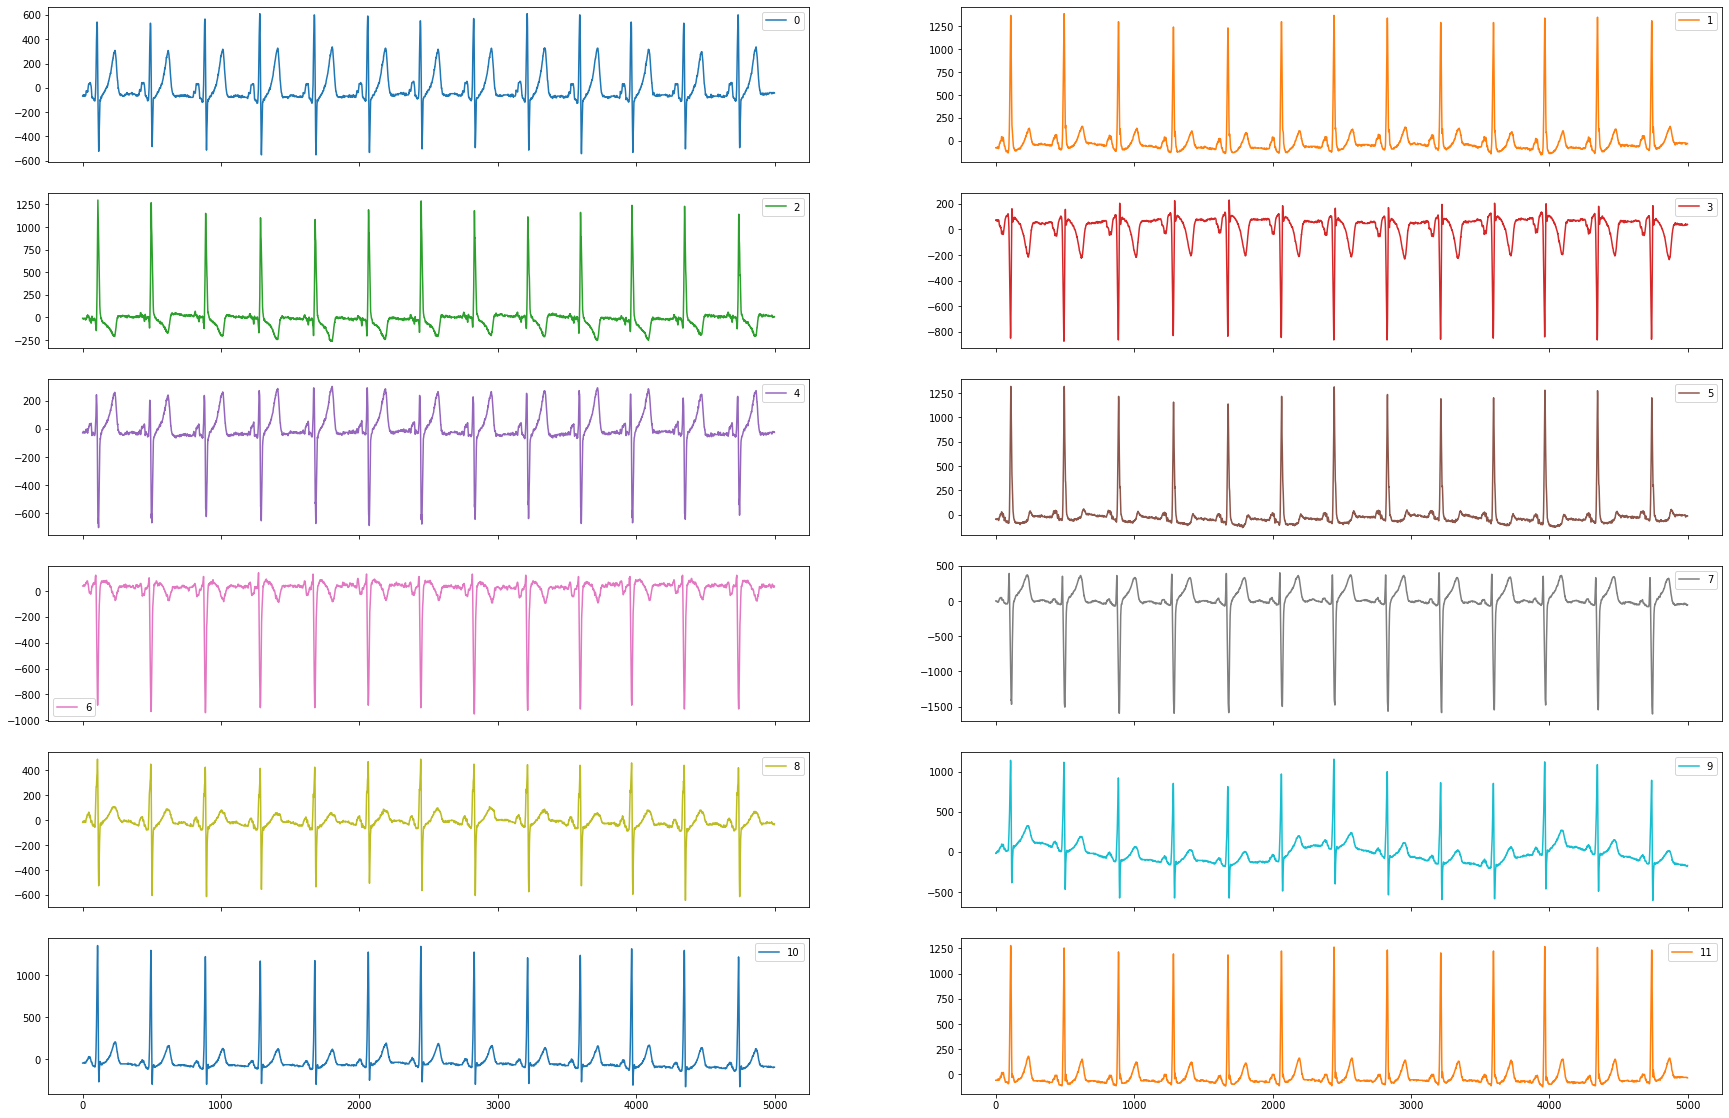

In [68]:
fig = pd.DataFrame(leads).T.plot.line(subplots = True,layout=(6,2), figsize=(30,20))